# Prolexitim Detector (DProlex v3)
## Binary Classifiers (Alex / NoAlex) using classical and word vector techniques
### Dataset from Prolexitim TAS-20 Spain, Prolexitim NLP and Spanish 3Billion Word2Vec
<hr>
June 2019.<br> Prolexitim dataset version 1.2 (MPGS-TFM-Submission).<br> 
Raúl Arrabales Moreno (Psicobótica / Serendeepia Research)<br>
<a target="_blank" href="http://www.conscious-robots.com/">http://www.conscious-robots.com/</a> <br>
<hr>
Spanish Word Vectors from: <a taget="_blank" href="https://github.com/aitoralmeida/spanish_word2vec">Spanish 3B Pre-trained Word2Vec</a>

## Load Word Vectors and Documents (texts + labels)
- Word Vectors are obtained from the pre-trained Spanish 3B Word2Vec.
- Documents are obtained from the Prolexitim Pilot Study.
    - Text are narratives from Prolexitim NLP. 
    - Labels are categorical values from Prolexitim TAS-20.


### Loading the word vectors

In [1]:
from gensim.models import KeyedVectors

In [2]:
# My copy of Spanish 3 Billion Word2Vec
word_vectors = KeyedVectors.load('D:\Dropbox-Array2001\Dropbox\DataSets\Spanish Word2Vec\complete.kv', mmap='r')

In [3]:
# Testing Word Vectors for Spanish
word_vectors.most_similar("niño")

[('chiquillo', 0.863490104675293),
 ('bebé', 0.85056471824646),
 ('crío', 0.842483401298523),
 ('muchacho', 0.7765985727310181),
 ('niñito', 0.7588649988174438),
 ('chico', 0.75837242603302),
 ('cachorro', 0.7369438409805298),
 ('muchachito', 0.7227176427841187),
 ('gatito', 0.6718686819076538),
 ('hombre', 0.6658662557601929)]

In [4]:
# Testing Word Vectors for Spanish
word_vectors.get_vector("niño")

memmap([-9.8019737e-01,  3.7916845e-01, -1.6284896e+00,  7.4026036e-01,
         6.7275375e-01, -1.6113833e+00, -1.4873409e+00,  1.6933979e+00,
         3.0024448e-01,  6.1126029e-01, -1.7352545e+00,  2.5489315e-01,
        -7.4795651e-01,  1.0910559e+00, -2.1026888e+00, -4.4130564e+00,
         4.2894289e-01,  1.0395617e+00,  1.6460708e+00,  1.0484180e+00,
         1.4824442e+00,  1.6438122e+00, -2.7626188e+00,  9.5058024e-01,
         8.9740849e-01,  1.6531191e+00, -1.2386736e+00,  1.6032706e+00,
        -2.3379698e+00,  7.8928012e-01,  2.1672912e+00, -9.9437529e-01,
        -2.5328231e+00,  3.1492624e-01,  1.5492657e-01, -8.9571148e-02,
         3.7125247e+00, -1.0850103e+00, -1.0432119e+00, -2.8284986e+00,
        -2.1611533e+00,  3.6355894e+00, -2.8690529e+00, -1.6870648e-01,
        -4.2504200e-01,  2.8080521e+00,  4.1607413e+00,  2.0719736e+00,
        -9.5222074e-01,  1.1894293e+00,  1.0287092e+00, -2.3548654e-01,
        -1.3844434e+00,  2.4121676e-01,  9.0101380e-03,  1.02651

In [5]:
# Testing Word Vectors for Spanish
word_vectors.similar_by_vector(word_vectors.get_vector("niño") - word_vectors.get_vector("niña"))

[('individuo', 0.5064163208007812),
 ('hombre', 0.4954623878002167),
 ('muchacho', 0.4840112328529358),
 ('úrgalo', 0.47156092524528503),
 ('niño', 0.47056442499160767),
 ('hombredios', 0.46997901797294617),
 ('chiquillo', 0.4607599079608917),
 ('hom\xadbre', 0.46047237515449524),
 ('ejército…', 0.45903706550598145),
 ('gyorn', 0.44549915194511414)]

### Loading Prolexitim TAS-20 + NLP Dataset Load

In [6]:
import pandas as pd 

In [7]:
# My copy of Prolexitim join tables with TAS-20 categorical label and narratives from Prolexitim NLP
tasnlp_dataset_path = "D:\\Dropbox-Array2001\\Dropbox\\UNI\\MPGS\\2_TFM\\Datos\\prolexitim-merged-1.3.csv"

In [8]:
docs_df = pd.read_csv(tasnlp_dataset_path,header=0,delimiter="\t")

In [9]:
# We're only intereted in the Spanish text and the corresponding Alexithymia label
docs_df = docs_df.dropna()
docs_df = docs_df[['Text', 'alex-a']]
docs_df.columns = ['Text', 'AlexLabel']
docs_df.sample(n=6)

,Text,AlexLabel
153,un hombre que mata a su amante porque ella le ...,Alex
51,"Esto es una madre con su hijo, que le está dan...",NoAlex
52,Esto es un señor que va a un faro porque le gu...,NoAlex
297,un hombre que la mató porque era suya.,NoAlex
226,"Carlito tiene 10 años, y toca el violín muy a ...",NoAlex
87,"Érase una vez un grupo de trabajadores que, tr...",NoAlex


In [10]:
# We have a very unbalance dataset
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,31
NoAlex,240
PosAlex,45


In [11]:
# And we decided to consider both Possible Alexithymia and Alexithymia as the same (Positive) class
docs_df['AlexLabel'] = docs_df['AlexLabel'].apply(lambda x: x.replace('PosAlex', 'Alex'))

In [12]:
docs_df.groupby(by='AlexLabel').count()

,Text
AlexLabel,
Alex,76
NoAlex,240


## Prepare training data set
- X (independent variable) --> Text (narrative in Spanish)
- y (dependent variable) --> Alexithymia label (Alex/NoAlex)

In [13]:
import numpy as np

In [14]:
X = docs_df['Text'].apply(lambda x: x.split())
y = docs_df['AlexLabel']

X = np.array(X)
y = np.array(y)

In [15]:
print ("Number of examples: %s" % len(y))

Number of examples: 316


## Evaluation Metrics definition

In [16]:
from sklearn.metrics import precision_score, recall_score, f1_score, make_scorer
from sklearn.metrics import roc_auc_score

In [17]:
# Precision detecting the presencen of alexithymia
alex_precision_scorer = make_scorer(precision_score, pos_label='Alex')

# Precision detecting the absence of alexithymia
noalex_precision_scorer = make_scorer(precision_score, pos_label='NoAlex')

# sensitivity for the presence of alexithymia: recall, hit rate, or true positive rate (TPR).
alex_recall_scorer = make_scorer(recall_score, pos_label='Alex')

# sensitivity for the absence of alexithymia: recall, hit rate, or true positive rate (TPR).
noalex_recall_scorer = make_scorer(recall_score, pos_label='NoAlex')

# F1 Score the presence of alexithymia: harmonic mean of precision and sensitivity.
alex_f1_scorer = make_scorer(f1_score, pos_label='Alex')

# F1 Score the absence of alexithymia: harmonic mean of precision and sensitivity.
noalex_f1_scorer = make_scorer(f1_score, pos_label='NoAlex')

In [18]:
# A dataframe to store all evaluation results
col_names =  ['ModelName', 'ShortName', 'Accuracy', 'AUC', 'AlexPrecision', 'NoAlexPrecision', 'AlexRecall', 'NoAlexRecall', 'AlexF1', 'NoAlexF1']
eval_df  = pd.DataFrame(columns = col_names)
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1


## Evaluation helper functions

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils.multiclass import unique_labels

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = ['Alex','NoAlex']
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

## Classifier with Word Counts and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [22]:
# Multinomial Naive Bayes using vectors with word counts
multinb_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("multinomial nb", MultinomialNB())])

In [23]:
cross_val_score(multinb_pipe, X, y, cv=10).mean()

0.7628024193548388

In [24]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [25]:
accuracy = scores['test_score'].mean()
accuracy

0.7628024193548388

In [26]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [27]:
auc = scores['test_score'].mean()
auc

0.5906994047619049

In [28]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)
# Warning messages appear due to no positive Alexithymia predicted samples

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

In [29]:
alex_prec = scores['test_score'].mean()
alex_prec

0.1

In [30]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [31]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7620967741935484

In [32]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [33]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0125

In [34]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [35]:
noalex_recall = scores['test_score'].mean()
noalex_recall

1.0

In [36]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

In [37]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.02222222222222222

In [38]:
scores = cross_validate(multinb_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [39]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.864935064935065

Confusion matrix, without normalization
[[  1  75]
 [  0 240]]


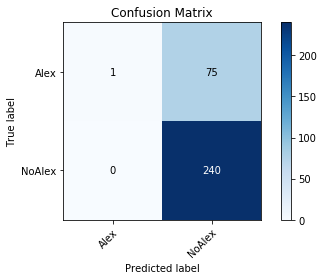

In [40]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(multinb_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

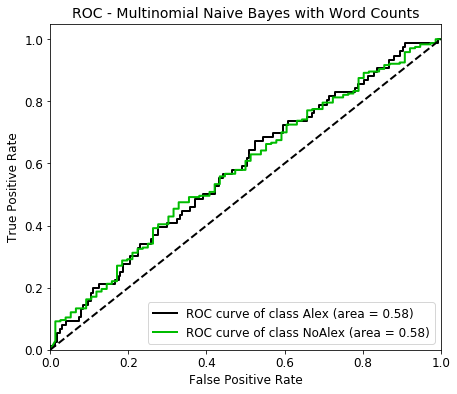

In [41]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(multinb_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Multinomial Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [42]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Multinomial Naive Bayes with WC Vectors", "MultiNB",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [43]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.1,0.762097,0.0125,1.0,0.022222,0.864935


## Classifier with Word Counts and Multivariate Bernoulli Naive Bayes
Multivariate Bernoulli works with discrete data (boolean flags), therefore we use here a feature vector with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [44]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [45]:
# Multinomial Naive Bayes using vectors with word counts
bernnb_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("bernoulli nb", BernoulliNB())])

In [46]:
cross_val_score(bernnb_pipe, X, y, cv=10).mean()

0.7596774193548388

In [47]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [48]:
accuracy = scores['test_score'].mean()
accuracy

0.7596774193548388

In [49]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [50]:
auc = scores['test_score'].mean()
auc

0.4506696428571428

In [51]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

In [52]:
alex_prec = scores['test_score'].mean()
alex_prec

0.0

In [53]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [54]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7596774193548388

In [55]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [56]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0

In [57]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [58]:
noalex_recall = scores['test_score'].mean()
noalex_recall

1.0

In [59]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

In [60]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.0

In [61]:
scores = cross_validate(bernnb_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [62]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.8633766233766235

Confusion matrix, without normalization
[[  0  76]
 [  0 240]]


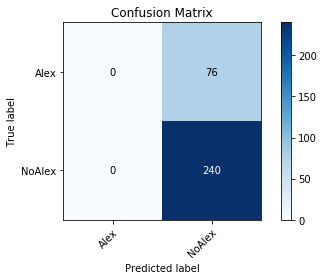

In [63]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(bernnb_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

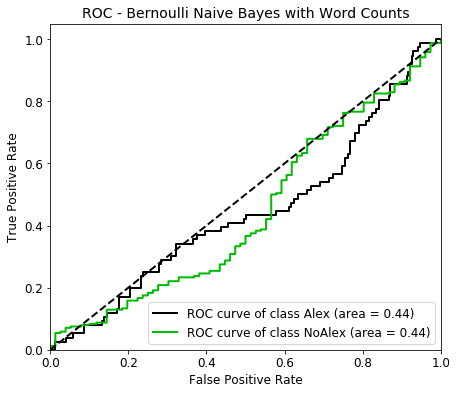

In [64]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(bernnb_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Bernoulli Naive Bayes with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [65]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Bernoulli Naive Bayes with Word Counts", "BernoulliNB",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [66]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.1,0.762097,0.0125,1.0,0.022222,0.864935
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.759677,0.450670,0.0,0.759677,0.0000,1.0,0.000000,0.863377


## Classifier with TF/IDF and Multinomial Naive Bayes
Multinomial Naive Bayes works with ocurrence counts, therefore we use here a feature vector with Term Frequency (TF/IDF) for each document. 
- X: Vector with term frequency and inverse document frequency.
- y: Alexithymia label.

In [67]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [68]:
# Multinomial Naive Bayes using vectors with word counts
multinb_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("multinomial nb tfidf", MultinomialNB())])

In [69]:
cross_val_score(multinb_tfidf_pipe, X, y, cv=10).mean()

0.7596774193548388

In [70]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [71]:
accuracy = scores['test_score'].mean()
accuracy

0.7596774193548388

In [72]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [73]:
auc = scores['test_score'].mean()
auc

0.5506696428571429

In [74]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

In [75]:
alex_prec = scores['test_score'].mean()
alex_prec

0.0

In [76]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [77]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7596774193548388

In [78]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [79]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0

In [80]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [81]:
noalex_recall = scores['test_score'].mean()
noalex_recall

1.0

In [82]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

In [83]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.0

In [84]:
scores = cross_validate(multinb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [85]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.8633766233766235

Confusion matrix, without normalization
[[  0  76]
 [  0 240]]


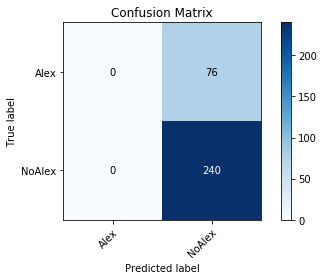

In [86]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(multinb_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

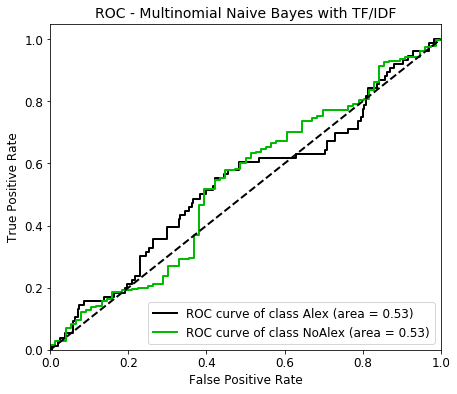

In [87]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(multinb_tfidf_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Multinomial Naive Bayes with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [88]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Multinomial Naive Bayes with TF/IDF", "MultiNB-Tfidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [89]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.1,0.762097,0.0125,1.0,0.022222,0.864935
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.759677,0.450670,0.0,0.759677,0.0000,1.0,0.000000,0.863377
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.759677,0.550670,0.0,0.759677,0.0000,1.0,0.000000,0.863377


## Classifier with TF/IDF and Multivariate Bernoulli Naive Bayes
Multivariate Bernoulli works with discrete data (boolean flags), therefore we use here a feature vector with TF/IDF for each document. 
- X: Vector with term frequencies.
- y: Alexithymia label.

In [90]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [91]:
bernnb_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("bernoulli nb tfidf", BernoulliNB())])

In [92]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [93]:
accuracy = scores['test_score'].mean()
accuracy

0.7596774193548388

In [94]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [95]:
auc = scores['test_score'].mean()
auc

0.4506696428571428

In [96]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: U

In [97]:
alex_prec = scores['test_score'].mean()
alex_prec

0.0

In [98]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [99]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7596774193548388

In [100]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [101]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0

In [102]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [103]:
noalex_recall = scores['test_score'].mean()
noalex_recall

1.0

In [104]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: Undefined

In [105]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.0

In [106]:
scores = cross_validate(bernnb_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [107]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.8633766233766235

Confusion matrix, without normalization
[[  0  76]
 [  0 240]]


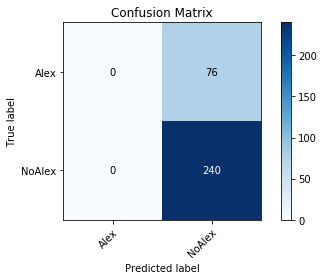

In [108]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(bernnb_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

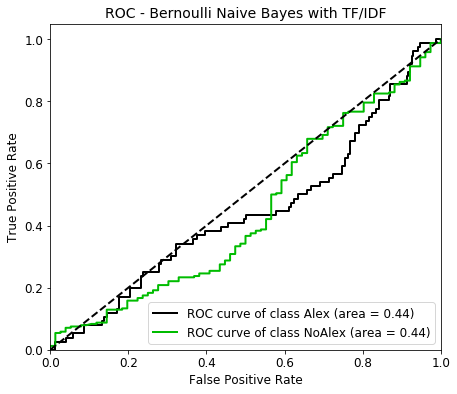

In [109]:
# ROC CURVE PLOT
import scikitplot as skplt
y_probas = cross_val_predict(bernnb_tfidf_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y, y_probas, title="ROC - Bernoulli Naive Bayes with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [110]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Bernoulli Naive Bayes with TF/IDF", "BernoulliNBT-fidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [111]:
eval_df.tail()

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.1,0.762097,0.0125,1.0,0.022222,0.864935
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.759677,0.450670,0.0,0.759677,0.0000,1.0,0.000000,0.863377
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.759677,0.550670,0.0,0.759677,0.0000,1.0,0.000000,0.863377
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.759677,0.450670,0.0,0.759677,0.0000,1.0,0.000000,0.863377


## Classifier with Word Counts and Linear Support Vector Machine
C-Support Vector Classification (SVM) with word counts for each document. 
- X: Vector with word counts.
- y: Alexithymia label.

In [112]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [113]:
svc_pipe = Pipeline([("count_vectorizer", CountVectorizer(analyzer=lambda x: x)), ("linear svc", SVC(kernel="linear"))])

In [114]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [115]:
accuracy = scores['test_score'].mean()
accuracy

0.6608870967741935

In [116]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [117]:
auc = scores['test_score'].mean()
auc

0.4783482142857142

In [118]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

In [119]:
alex_prec = scores['test_score'].mean()
alex_prec

0.2587301587301587

In [120]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [121]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7580132323393193

In [122]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [123]:
alex_recall = scores['test_score'].mean()
alex_recall

0.17857142857142855

In [124]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [125]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.8125

In [126]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

In [127]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.19965237377002082

In [128]:
scores = cross_validate(svc_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [129]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.7825746400634148

Confusion matrix, without normalization
[[ 14  62]
 [ 45 195]]


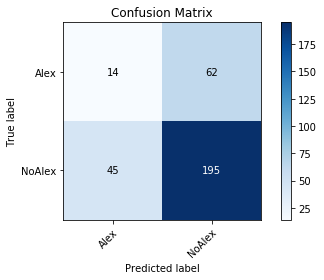

In [130]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(svc_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [131]:
# Get probas for SVC predictions
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVC()
clf = CalibratedClassifierCV(svm)
vectorizer = CountVectorizer(analyzer=lambda x: x, binary=True)
Xtrainvecs = vectorizer.fit_transform(X_train)
clf.fit(Xtrainvecs, y_train)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
            cv='warn', method='sigmoid')

In [132]:
Xtestvecs = vectorizer.transform(X_test)
y_probas = clf.predict_proba(Xtestvecs)

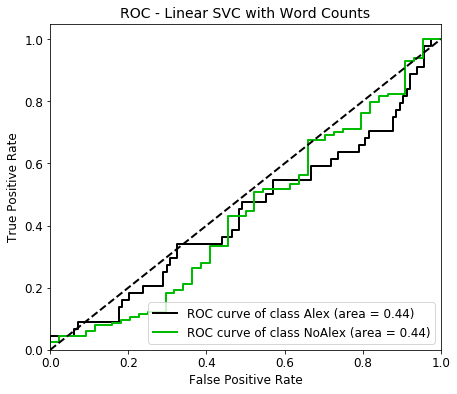

In [133]:
# ROC CURVE PLOT
import scikitplot as skplt
# y_probas = cross_val_predict(svc_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Linear SVC with Word Counts",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [134]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Linear SVC with Word Counts", "SVC-wc",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [135]:
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.10000,0.762097,0.012500,1.0000,0.022222,0.864935
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.759677,0.450670,0.00000,0.759677,0.000000,1.0000,0.000000,0.863377
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.759677,0.550670,0.00000,0.759677,0.000000,1.0000,0.000000,0.863377
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.759677,0.450670,0.00000,0.759677,0.000000,1.0000,0.000000,0.863377
4,Linear SVC with Word Counts,SVC-wc,0.660887,0.478348,0.25873,0.758013,0.178571,0.8125,0.199652,0.782575


## Classifier with TF/IDF and Linear Support Vector Machine
C-Support Vector Classification (SVM) with TF/IDF for each document. 
- X: Vector with term frequency.
- y: Alexithymia label.

In [136]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [137]:
svc_tfidf_pipe = Pipeline([("tfidf_vectorizer", TfidfVectorizer(analyzer=lambda x: x)), ("linear svc tfidf", SVC(kernel="linear"))])

In [138]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=('accuracy'),
                        return_train_score=True)

In [139]:
accuracy = scores['test_score'].mean()
accuracy

0.7565524193548387

In [140]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=('roc_auc'),
                        return_train_score=True)

In [141]:
auc = scores['test_score'].mean()
auc

0.5029017857142858

In [144]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_precision_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [145]:
alex_prec = scores['test_score'].mean()
alex_prec

0.0

In [146]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_precision_scorer, 
                        return_train_score=True)

In [147]:
noalex_prec = scores['test_score'].mean()
noalex_prec

0.7588709677419355

In [148]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_recall_scorer, 
                        return_train_score=True)

In [149]:
alex_recall = scores['test_score'].mean()
alex_recall

0.0

In [150]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_recall_scorer, 
                        return_train_score=True)

In [151]:
noalex_recall = scores['test_score'].mean()
noalex_recall

0.9958333333333333

In [152]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=alex_f1_scorer, 
                        return_train_score=True)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [153]:
alex_f1 = scores['test_score'].mean()
alex_f1

0.0

In [154]:
scores = cross_validate(svc_tfidf_pipe, X, y, cv=10,
                        scoring=noalex_f1_scorer, 
                        return_train_score=True)

In [155]:
noalex_f1 = scores['test_score'].mean()
noalex_f1

0.8612987012987012

Confusion matrix, without normalization
[[  0  76]
 [  1 239]]


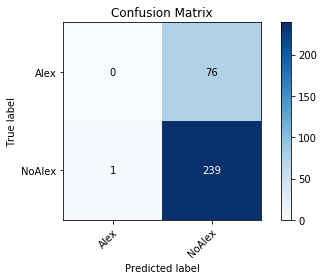

In [156]:
# CONFUSION MATRIX PLOT
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2)
y_pred = cross_val_predict(svc_tfidf_pipe, X, y, cv=10)
plot_confusion_matrix(y, y_pred, classes=['Alex', 'NoAlex'],
                      title='Confusion Matrix')

In [157]:
# Get probas for SVC predictions
from sklearn.calibration import CalibratedClassifierCV
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

svm = SVC()
clf = CalibratedClassifierCV(svm)
vectorizer = TfidfVectorizer(analyzer=lambda x: x, binary=True)
Xtrainvecs = vectorizer.fit_transform(X_train)
clf.fit(Xtrainvecs, y_train)

C:\Users\array\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\array\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma

CalibratedClassifierCV(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
            cv='warn', method='sigmoid')

In [158]:
Xtestvecs = vectorizer.transform(X_test)
y_probas = clf.predict_proba(Xtestvecs)

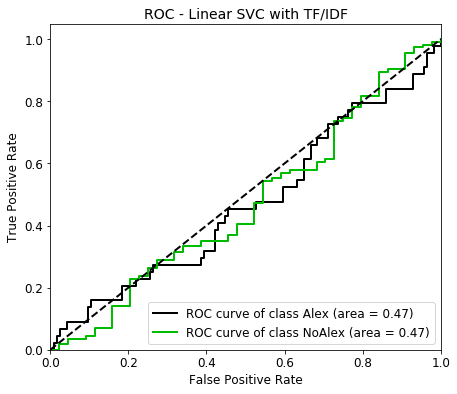

In [159]:
# ROC CURVE PLOT
import scikitplot as skplt
# y_probas = cross_val_predict(svc_pipe, X, y, cv=10, method='predict_proba')
skplt.metrics.plot_roc(y_test, y_probas, title="ROC - Linear SVC with TF/IDF",
                      plot_micro=False, plot_macro=False,
                      figsize=(7,6), text_fontsize=12, title_fontsize=14)
plt.show()

In [160]:
# Save all results from this model to the evaluation results dataframe
eval_df.loc[len(eval_df)] = ["Linear SVC with TF/IDF", "SVC-wc-Tfidf",
                             accuracy, auc, alex_prec, noalex_prec, 
                             alex_recall, noalex_recall, alex_f1, noalex_f1]

In [161]:
eval_df

,ModelName,ShortName,Accuracy,AUC,AlexPrecision,NoAlexPrecision,AlexRecall,NoAlexRecall,AlexF1,NoAlexF1
0,Multinomial Naive Bayes with WC Vectors,MultiNB,0.762802,0.590699,0.10000,0.762097,0.012500,1.000000,0.022222,0.864935
1,Bernoulli Naive Bayes with Word Counts,BernoulliNB,0.759677,0.450670,0.00000,0.759677,0.000000,1.000000,0.000000,0.863377
2,Multinomial Naive Bayes with TF/IDF,MultiNB-Tfidf,0.759677,0.550670,0.00000,0.759677,0.000000,1.000000,0.000000,0.863377
3,Bernoulli Naive Bayes with TF/IDF,BernoulliNBT-fidf,0.759677,0.450670,0.00000,0.759677,0.000000,1.000000,0.000000,0.863377
4,Linear SVC with Word Counts,SVC-wc,0.660887,0.478348,0.25873,0.758013,0.178571,0.812500,0.199652,0.782575
5,Linear SVC with TF/IDF,SVC-wc-Tfidf,0.756552,0.502902,0.00000,0.758871,0.000000,0.995833,0.000000,0.861299
